Google Colab上執行  
使用Lena，放在google colab的sample_data目錄下後再進行存取  
SourceCode@Google Colab: https://colab.research.google.com/drive/1rwAc14OIftuRDrek0cxGfmSuDefoDsgl

In [0]:
# _*_ coding: utf-8 _*_
# _*_ coding: cp950 _*_

# author: Chi-Hsu Chen (css920@gmail.com)
# datetime: 20200602

import numpy as np
import cv2
import time
from google.colab.patches import cv2_imshow

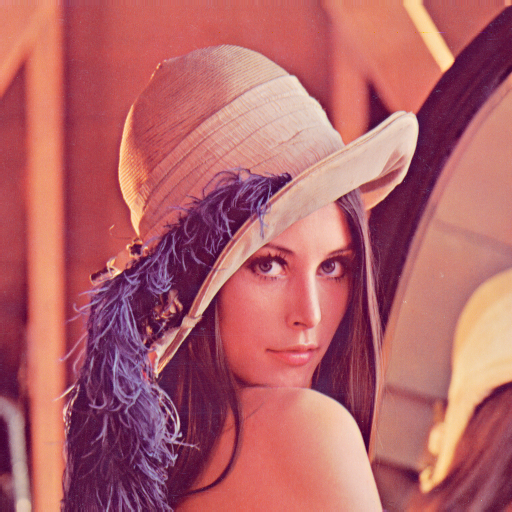

In [2]:
# 顯示原圖
imgLenaColor=cv2.imread('sample_data/lena.png')
cv2_imshow(imgLenaColor)

# 模糊

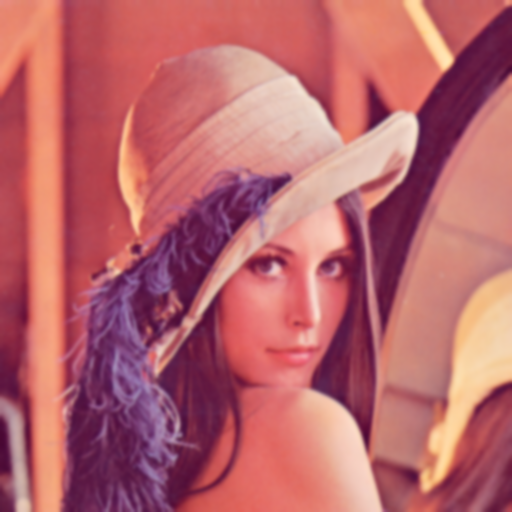

In [15]:
# 重複進行模糊3次
imgLenaBlur=cv2.GaussianBlur(imgLenaColor,(5,5),1)
imgLenaBlur=cv2.GaussianBlur(imgLenaBlur,(5,5),1)
imgLenaBlur=cv2.GaussianBlur(imgLenaBlur,(5,5),1)

cv2_imshow(imgLenaBlur)

# 邊緣檢測
組合 x-axis, y-axis 的影像合成

沿著x軸找邊緣


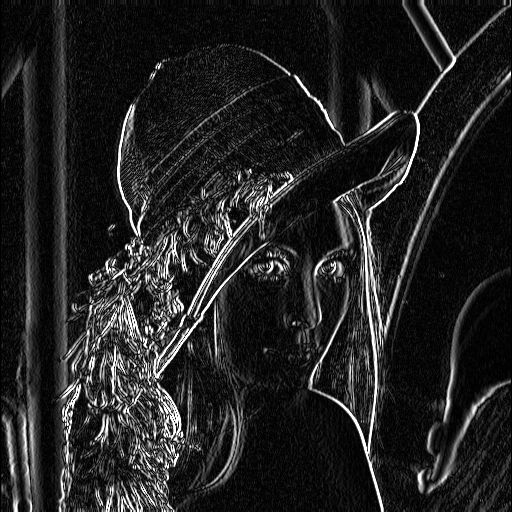

沿著y軸找邊緣


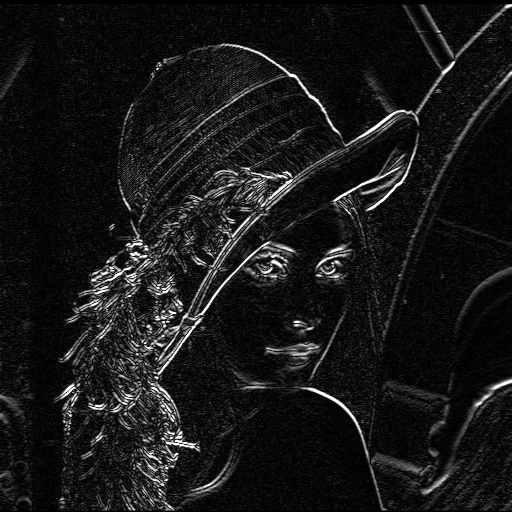

兩張圖各取一半權重，加權合併


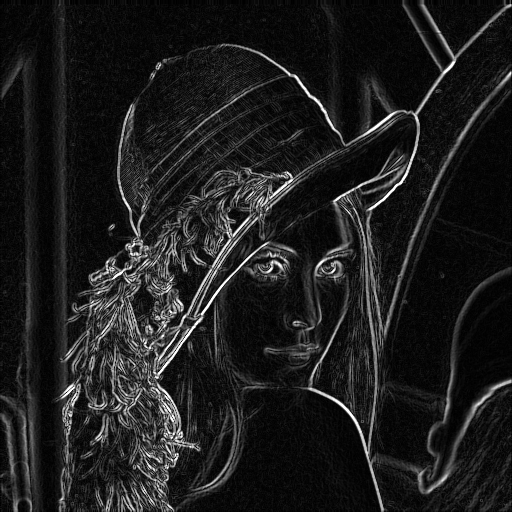

In [13]:
# 轉換為灰階圖
imgLenaGray=cv2.cvtColor(imgLenaColor,cv2.COLOR_BGR2GRAY)

# 沿著x軸找邊緣
imgLena_SOBX=cv2.Sobel(imgLenaGray,cv2.CV_16S,dx=1,dy=0,ksize=3)
imgLena_SOBX=cv2.convertScaleAbs(imgLena_SOBX)   # 如影像陣列中有負值，在此轉換
print('沿著x軸找邊緣')
cv2_imshow(imgLena_SOBX)

# 沿著y軸找邊緣
imgLena_SOBY=cv2.Sobel(imgLenaGray,cv2.CV_16S,dx=0,dy=1,ksize=3)
imgLena_SOBY=cv2.convertScaleAbs(imgLena_SOBY)   # 如影像陣列中有負值，在此轉換
print('沿著y軸找邊緣')
cv2_imshow(imgLena_SOBY)

# 將兩張圖各取一半權重，加權合併
imgEdge=cv2.addWeighted(imgLena_SOBX,0.5,imgLena_SOBY,0.5,0)
print('兩張圖各取一半權重，加權合併')
cv2_imshow(imgEdge)
